<a href="https://colab.research.google.com/github/MarjeteV/604/blob/main/(delete)Story_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
def standardize_material_name(material):
    return material.strip().lower().replace(" ", "_")

def get_mineral_commodity_summary():
    # Define rare earth elements
    rare_earths = [
        "cerium", "dysprosium", "erbium", "europium", "gadolinium", "holmium",
        "lanthanum", "lutetium", "neodymium", "praseodymium", "samarium", "terbium",
        "thulium", "ytterbium"
    ]

    mcs = {
        "Material": [
            # Original list from chart
            "Arsenic, all forms", "Asbestos", "Cesium", "Fluorspar", "Gallium", "Graphite (Natural)",
            "Indium", "Manganese", "Mica (Natural), sheet", "Niobium (Columbium)", "Rubidium",
            "Scandium", "Strontium", "Tantalum", "Yttrium", "Gemstones",
            "Abrasives, fused aluminum oxide", "Nepheline Syenite", "Rare Earths",
            "Titanium, sponge metal", "Bismuth", "Potash", "Stone (Dimension)",
            "Diamond (Industrial), stones", "Platinum", "Antimony, metal and oxide",
            "Zinc, refined", "Barite", "Bauxite", "Iron Oxide Pigments, natural and synthetic",
            "Titanium Mineral Concentrates", "Chromium, all forms", "Peat", "Tin, refined",
            "Abrasives, silicon carbide", "Silver", "Cobalt", "Garnet (Industrial)",
            "Rhenium", "Alumina", "Vanadium", "Nickel", "Diamond (Industrial), bort, grit, and dust and powder",
            "Magnesium Compounds", "Germanium", "Iodine", "Magnesium Metal", "Selenium",
            "Tungsten", "Silicon, metal and ferrosilicon", "Copper, refined", "Aluminum",
            "Palladium", "Lead, refined", "Mica (Natural), scrap and flake", "Perlite",
            "Lithium", "Tellurium", "Salt", "Bromine", "Zirconium, ores and concentrates",
            "Cement", "Vermiculite",
            # Adding Lanthanides
            "Cerium", "Dysprosium", "Erbium", "Europium", "Gadolinium", "Holmium",
            "Lanthanum", "Lutetium", "Neodymium", "Praseodymium", "Samarium", "Terbium",
            "Thulium", "Ytterbium",
            # Adding low import reliance materials
            "Beryllium", "Boron", "Cadmium", "Diatomite", "Gold", "Iron and Steel",
            "Molybdenum", "Titanium Dioxide", "Zeolites"
        ],
        "Import_Reliance_Pct": [
            # Original percentages
            100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 99,
            95, 95, 95, 95, 94, 91, 87, 84, 83, 82, 77, 75, 75, 75, 75, 74, 74, 74, 73, 69,
            67, 67, 60, 59, 58, 57, 56, 52, 50, 50, 50, 50, 50, 50, 46, 44, 37, 35, 28, 26,
            25, 25, 25, 25, 25, 22, 20,
            # Lanthanides (included in Rare Earths at 95%)
            95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95,
            # Low import reliance materials (<20%)
            15, 15, 15, 15, 15, 15, 15, 15, 15
        ],
        "ImportCountries": [
            ["China", "Morocco", "Malaysia", "Belgium"],
            ["Brazil", "Russia"],
            ["Germany"],
            ["Mexico", "Vietnam", "China", "South Africa"],
            ["Japan", "China", "Germany", "Canada"],
            ["China", "Mexico", "Canada", "Madagascar"],
            ["Republic of Korea", "Canada", "Belgium"],
            ["Gabon", "South Africa", "Australia", "Georgia"],
            ["China", "Brazil", "India", "Belgium"],
            ["Brazil", "Canada"],
            ["China", "Germany", "Russia"],
            ["Japan", "China", "Germany", "Philippines"],
            ["Mexico", "Germany", "China"],
            ["China", "Germany", "Australia", "Indonesia"],
            ["China", "Germany", "France", "Republic of Korea"],
            ["India", "Israel", "Belgium", "South Africa"],
            ["China", "Canada", "Brazil", "Austria"],
            ["Canada"],
            ["China", "Malaysia", "Japan", "Estonia"],
            ["Japan", "Kazakhstan", "Saudi Arabia", "Ukraine"],
            ["China", "Republic of Korea", "Belgium", "Mexico"],
            ["Canada", "Russia", "Belarus"],
            ["Brazil", "China", "Italy", "Turkey"],
            ["India", "South Africa", "Russia", "Congo (Kinshasa)"],
            ["South Africa", "Switzerland", "Germany", "Belgium"],
            ["China", "Belgium", "India", "Bolivia"],
            ["Canada", "Mexico", "Peru", "Republic of Korea"],
            ["India", "China", "Morocco", "Mexico"],
            ["Jamaica", "Turkey", "Guyana", "Australia"],
            ["China", "Germany", "Brazil", "Canada"],
            ["South Africa", "Madagascar", "Australia", "Canada"],
            ["South Africa", "Kazakhstan", "Russia", "Canada"],
            ["Canada"],
            ["Peru", "Bolivia", "Indonesia", "Malaysia"],
            ["China", "Brazil", "Canada", "Netherlands"],
            ["Mexico", "Canada", "Poland", "Switzerland"],
            ["Norway", "Canada", "Finland", "Japan"],
            ["South Africa", "Australia", "China", "India"],
            ["Chile", "Canada", "Germany", "Kazakhstan"],
            ["Brazil", "Australia", "Jamaica", "Canada"],
            ["Canada", "Brazil", "Austria", "Russia"],
            ["Canada", "Norway", "Finland", "Russia"],
            ["China", "Republic of Korea", "Ireland", "Russia"],
            ["China", "Israel", "Canada", "Brazil"],
            ["Belgium", "China", "Canada"],
            ["Chile", "Japan"],
            ["China", "Israel", "Taiwan"],
            ["Philippines", "Mexico", "Germany", "Canada"],
            ["China", "Germany", "Bolivia", "Vietnam"],
            ["Brazil", "Russia", "Canada", "Norway"],
            ["Chile", "Canada", "Mexico"],
            ["Canada", "United Arab Emirates", "Bahrain", "Russia"],
            ["Russia", "South Africa", "Italy", "Canada"],
            ["Canada", "Mexico", "Republic of Korea", "Australia"],
            ["China", "Canada", "India", "Finland"],
            ["Greece", "China", "Mexico"],
            ["Argentina", "Chile", "China", "Russia"],
            ["Canada", "Germany", "Philippines", "Japan"],
            ["Canada", "Chile", "Mexico", "Egypt"],
            ["Israel", "Jordan", "China"],
            ["South Africa", "Australia", "Senegal", "Russia"],
            ["Turkey", "Canada", "Greece", "Mexico"],
            ["South Africa", "Brazil", "Zimbabwe"],
            # Lanthanides (using same sources as Rare Earths)
            *[["China", "Malaysia", "Japan", "Estonia"] for _ in range(14)],
            # Low import reliance materials (example sources)
            ["Canada", "Mexico"], ["Turkey", "Chile"], ["South Korea", "Mexico"],
            ["Mexico", "China"], ["Canada", "Mexico"], ["Canada", "Brazil"],
            ["Chile", "Peru"], ["South Africa", "Australia"], ["Turkey", "South Africa"]
        ]
    }

    df = pd.DataFrame(mcs)

    df['Material_std'] = df['Material'].apply(standardize_material_name)

    rare_earth_mask = df['Material_std'].isin(rare_earths)
    if rare_earth_mask.any():
        rare_earth_row = df[rare_earth_mask].iloc[0].copy()
        rare_earth_row['Material'] = "Rare Earth Metals"
        rare_earth_row['Material_std'] = "rare earth metals"

        # Remove individual rare earth rows and add composite row
        df = df[~rare_earth_mask]
        df = pd.concat([df, pd.DataFrame([rare_earth_row])], ignore_index=True)

    return df
# Call the function
df = get_mineral_commodity_summary()

# Normalize the ImportCountries column
df= df.explode('ImportCountries')

# Rename columns for clarity
df= df.rename(columns={'ImportCountries': 'Country'})

# Display the normalized DataFrame
print(df.head())


             Material  Import_Reliance_Pct   Country        Material_std
0  Arsenic, all forms                  100     China  arsenic,_all_forms
0  Arsenic, all forms                  100   Morocco  arsenic,_all_forms
0  Arsenic, all forms                  100  Malaysia  arsenic,_all_forms
0  Arsenic, all forms                  100   Belgium  arsenic,_all_forms
1            Asbestos                  100    Brazil            asbestos


In [21]:
# Define the existing alliance_mapping
alliance_mapping = {
    'China': "Strained Relations",
    'Morocco': "Neutral",
    'Malaysia': "Neutral",
    'Belgium': "Ally",
    'Brazil': "Neutral",
    'Russia': "Strained Relations",
    'Germany': "Ally",
    'Mexico': "Neutral",
    'Vietnam': "Neutral",
    'South Africa': "Ally",
    'Japan': "Ally",
    'Canada': "Ally",
    'Madagascar': "Neutral",
    'Republic of Korea': "Ally",
    'Gabon': "Neutral",
    'Australia': "Ally",
    'Georgia': "Ally",
    'India': "Neutral",
    'Austria': "Neutral",
    'Estonia': "Ally",
    'Kazakhstan': "Strained Relations",
    'Saudi Arabia': "Ally",
    'Ukraine': "Ally",
    'Belarus': "Strained Relations",
    'Italy': "Ally",
    'Turkey': "Ally",
    'Congo (Kinshasa)': "Neutral",
    'Switzerland': "Ally",
    'Bolivia': "Neutral",
    'Peru': "Neutral",
    'Norway': "Ally",
    'Finland': "Ally",
    'Ireland': "Neutral",
    'Israel': "Ally",
    'Taiwan': "Ally",
    'Chile': "Neutral",
    'United Arab Emirates': "Ally",
    'Bahrain': "Ally",
    'Poland': "Ally",
    'Philippines': "Neutral",
    'Argentina': "Neutral",
    'Egypt': "Neutral",
    'Jordan': "Ally",
    'Senegal': "Neutral",
    'Zimbabwe': "Neutral",
    'Jamaica': "Neutral",
    'Greece': "Neutral",
    'South Korea': "Ally",
    'Indonesia': "Neutral",
    'Guyana': "Neutral",
    'France': "Ally",
    'Netherlands': "Ally"
}

# Flatten the list of countries from ImportCountries and extract unique ones
import itertools

import_countries = [
    ["China", "Morocco", "Malaysia", "Belgium"],
    ["Brazil", "Russia"],
    ["Germany"],
    ["Mexico", "Vietnam", "China", "South Africa"],
    ["Japan", "China", "Germany", "Canada"],
    ["Republic of Korea", "Canada", "Belgium"],
    ["Gabon", "South Africa", "Australia", "Georgia"],
    ["China", "Brazil", "India", "Belgium"],
    ["Brazil", "Canada"],
    ["China", "Germany", "Russia"],
    ["Japan", "China", "Germany", "Philippines"],
    ["Mexico", "Germany", "China"],
    ["China", "Germany", "Australia", "Indonesia"],
    ["China", "Germany", "France", "Republic of Korea"],
    ["India", "Israel", "Belgium", "South Africa"],
    ["China", "Canada", "Brazil", "Austria"],
    ["Canada"],
    ["China", "Malaysia", "Japan", "Estonia"],
    ["Japan", "Kazakhstan", "Saudi Arabia", "Ukraine"],
    ["China", "Republic of Korea", "Belgium", "Mexico"],
    ["Canada", "Russia", "Belarus"],
    ["Brazil", "China", "Italy", "Turkey"],
    ["India", "South Africa", "Russia", "Congo (Kinshasa)"],
    ["South Africa", "Switzerland", "Germany", "Belgium"],
    ["China", "Belgium", "India", "Bolivia"],
    ["Canada", "Mexico", "Peru", "Republic of Korea"],
    ["India", "China", "Morocco", "Mexico"],
    ["Jamaica", "Turkey", "Guyana", "Australia"],
    ["China", "Germany", "Brazil", "Canada"],
    ["South Africa", "Madagascar", "Australia", "Canada"],
    ["South Africa", "Kazakhstan", "Russia", "Canada"],
    ["Canada"],
    ["Peru", "Bolivia", "Indonesia", "Malaysia"],
    ["China", "Brazil", "Canada", "Netherlands"],
    ["Mexico", "Canada", "Poland", "Switzerland"],
    ["Norway", "Canada", "Finland", "Japan"],
    ["South Africa", "Australia", "China", "India"],
    ["Chile", "Canada", "Germany", "Kazakhstan"],
    ["Brazil", "Australia", "Jamaica", "Canada"],
    ["Canada", "Brazil", "Austria", "Russia"],
    ["Canada", "Norway", "Finland", "Russia"],
    ["China", "Republic of Korea", "Ireland", "Russia"],
    ["China," "Israel," "Canada," "Brazil"],
    ["Belgium", "China", "Canada"],
    ["Chile", "Japan"],
    ["China", "Israel", "Taiwan"],
    ["Philippines", "Mexico", "Germany", "Canada"],
    ["China", "Germany", "Bolivia", "Vietnam"],
    ["Brazil", "Russia", "Canada", "Norway"],
    ["Chile", "Canada", "Mexico"],
    ["Canada", "United Arab Emirates", "Bahrain", "Russia"],
    ["Russia", "South Africa", "Italy", "Canada"],
    ["Canada", "Mexico", "Republic of Korea", "Australia"],
    ["China", "Canada", "India", "Finland"],
    ["Greece", "China", "Mexico"],
    ["Argentina", "Chile", "China", "Russia"],
    ["Canada", "Germany", "Philippines", "Japan"],
    ["Canada", "Chile", "Mexico", "Egypt"],
    ["Israel", "Jordan", "China"],
    ["South Africa", "Australia", "Senegal", "Russia"],
    ["Turkey", "Canada", "Greece", "Mexico"],
    ["South Africa", "Brazil", "Zimbabwe"],
            # Lanthanides (using same sources as Rare Earths)
  *[["China", "Malaysia", "Japan", "Estonia"] for _ in range(14)],
            # Low import reliance materials (example sources)
    ["Canada", "Mexico"], ["Turkey", "Chile"], ["South Korea", "Mexico"],
    ["Mexico", "China"], ["Canada", "Mexico"], ["Canada", "Brazil"],
    ["Chile", "Peru"], ["South Africa", "Australia"], ["Turkey", "South Africa"]
]

# Flatten and extract unique countries
unique_countries = set(itertools.chain.from_iterable(import_countries))

# Find missing countries
missing_countries = unique_countries - set(alliance_mapping.keys())

# Add missing countries to alliance_mapping with default "Unknown"
for country in missing_countries:
    alliance_mapping[country] = "Unknown"

# Print missing countries added
print("Missing countries added:", missing_countries)

# Print updated alliance_mapping
print(alliance_mapping)


color_mapping = {
    "Ally": "blue",
    "Strained Relations": "red",
    "Neutral": "grey"  # Assign a color for "Unknown"
}

def map_alliances(import_countries):
    # Flatten the list of countries and map to alliance categories
    alliances = [alliance_mapping.get(country, "Unknown") for country in import_countries]
    return alliances
df['Alliances'] = df['ImportCountries'].apply(map_alliances)
def map_colors(import_countries):
    alliances = map_alliances(import_countries)
    # Use the color mapping for the first country as a representative
    return color_mapping.get(alliances[0], "gray")

df['Color'] = df['ImportCountries'].apply(map_colors)


Missing countries added: {'China,Israel,Canada,Brazil'}
{'China': 'Strained Relations', 'Morocco': 'Neutral', 'Malaysia': 'Neutral', 'Belgium': 'Ally', 'Brazil': 'Neutral', 'Russia': 'Strained Relations', 'Germany': 'Ally', 'Mexico': 'Neutral', 'Vietnam': 'Neutral', 'South Africa': 'Ally', 'Japan': 'Ally', 'Canada': 'Ally', 'Madagascar': 'Neutral', 'Republic of Korea': 'Ally', 'Gabon': 'Neutral', 'Australia': 'Ally', 'Georgia': 'Ally', 'India': 'Neutral', 'Austria': 'Neutral', 'Estonia': 'Ally', 'Kazakhstan': 'Strained Relations', 'Saudi Arabia': 'Ally', 'Ukraine': 'Ally', 'Belarus': 'Strained Relations', 'Italy': 'Ally', 'Turkey': 'Ally', 'Congo (Kinshasa)': 'Neutral', 'Switzerland': 'Ally', 'Bolivia': 'Neutral', 'Peru': 'Neutral', 'Norway': 'Ally', 'Finland': 'Ally', 'Ireland': 'Neutral', 'Israel': 'Ally', 'Taiwan': 'Ally', 'Chile': 'Neutral', 'United Arab Emirates': 'Ally', 'Bahrain': 'Ally', 'Poland': 'Ally', 'Philippines': 'Neutral', 'Argentina': 'Neutral', 'Egypt': 'Neutral', 'Jo

KeyError: 'ImportCountries'

Empty DataFrame
Columns: [Material, Import_Reliance_Pct, Country, Material_std, Alliance]
Index: []


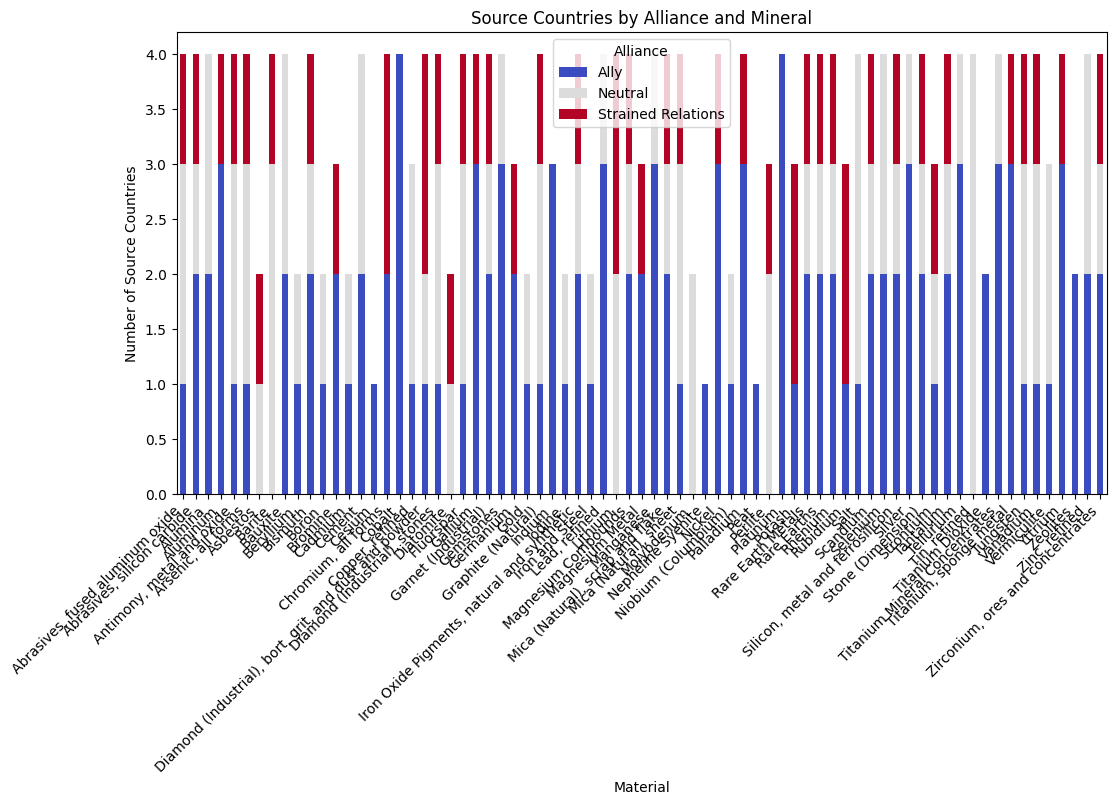

In [4]:
# Ensure all countries are mapped
missing_countries = set(df_exploded['Country']) - set(alliance_mapping.keys())
for country in missing_countries:
    alliance_mapping[country] = "Unknown"

# Add the 'Alliance' column
df_exploded['Alliance'] = df_exploded['Country'].map(alliance_mapping)

# Check for missing or unmapped alliances
print(df_exploded[df_exploded['Alliance'].isna()])

import pandas as pd
import matplotlib.pyplot as plt

# Prepare data
alliance_counts = df_exploded.groupby(['Material', 'Alliance']).size().unstack(fill_value=0)

# Plot
alliance_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')
plt.ylabel('Number of Source Countries')
plt.title('Source Countries by Alliance and Mineral')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Alliance')
plt.show()


              Material            Alliance
0   Arsenic, all forms  Strained Relations
1             Asbestos             Neutral
2               Cesium                Ally
3            Fluorspar             Neutral
4              Gallium                Ally
..                 ...                 ...
68      Iron and Steel                Ally
69          Molybdenum             Neutral
70    Titanium Dioxide                Ally
71            Zeolites                Ally
72   Rare Earth Metals  Strained Relations

[73 rows x 2 columns]
              Material  Import_Reliance_Pct  Risk_Score
0   Arsenic, all forms                  100       100.0
1             Asbestos                  100        90.0
2               Cesium                  100        80.0
3            Fluorspar                  100        90.0
4              Gallium                  100        80.0
..                 ...                  ...         ...
68      Iron and Steel                   15        20.5
69          M

In [6]:
# Function to calculate Supply Chain Metric
def calculate_supply_chain_metric(import_countries, alliance_mapping):
    num_suppliers = len(import_countries)  # Number of suppliers
    primary_supplier = import_countries[0]  # Assume the first country is the primary supplier

    # Supplier Diversity Points
    supplier_diversity_points = 20 / num_suppliers if num_suppliers > 0 else 20

    # Primary Supplier Alliance Risk
    primary_alliance = alliance_mapping.get(primary_supplier, "Unknown")
    alliance_risk_points = {
        "Competitor": 10,
        "Neutral": 7,
        "Ally": 5,
        "Unknown": 8
    }.get(primary_alliance, 8)

    # Supply Chain Stability Points (set to default for simplicity)
    # You can customize this based on geopolitical risk indices
    supply_chain_stability_points = {
        "Competitor": 10,
        "Neutral": 8,
        "Ally": 5,
        "Unknown": 9
    }.get(primary_alliance, 9)

    # Final Metric
    return supplier_diversity_points + alliance_risk_points + supply_chain_stability_points

# Apply the metric to each row in the DataFrame
df['Supply_Chain_Metric'] = df['ImportCountries'].apply(
    lambda countries: calculate_supply_chain_metric(countries, alliance_mapping)
)

# Display the updated DataFrame
print(df[['Material', 'Import_Reliance_Pct', 'Supply_Chain_Metric']])
# Weighted Combination
def calculate_total_vulnerability(row, w1=0.5, w2=0.5):
    return w1 * row['Risk_Score'] + w2 * row['Supply_Chain_Metric']

# Add the Total Vulnerability Score to the DataFrame
df['Total_Vulnerability_Score'] = df.apply(calculate_total_vulnerability, axis=1)

# Display the updated DataFrame
print(df[['Material', 'Risk_Score', 'Supply_Chain_Metric', 'Total_Vulnerability_Score']])


              Material  Import_Reliance_Pct  Supply_Chain_Metric
0   Arsenic, all forms                  100                 22.0
1             Asbestos                  100                 25.0
2               Cesium                  100                 30.0
3            Fluorspar                  100                 20.0
4              Gallium                  100                 15.0
..                 ...                  ...                  ...
68      Iron and Steel                   15                 20.0
69          Molybdenum                   15                 25.0
70    Titanium Dioxide                   15                 20.0
71            Zeolites                   15                 20.0
72   Rare Earth Metals                   95                 22.0

[73 rows x 3 columns]
              Material  Risk_Score  Supply_Chain_Metric  \
0   Arsenic, all forms       100.0                 22.0   
1             Asbestos        90.0                 25.0   
2               Cesi

<ipython-input-7-19e2e9d6df0b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Material', y='Total_Vulnerability_Score', palette='coolwarm')


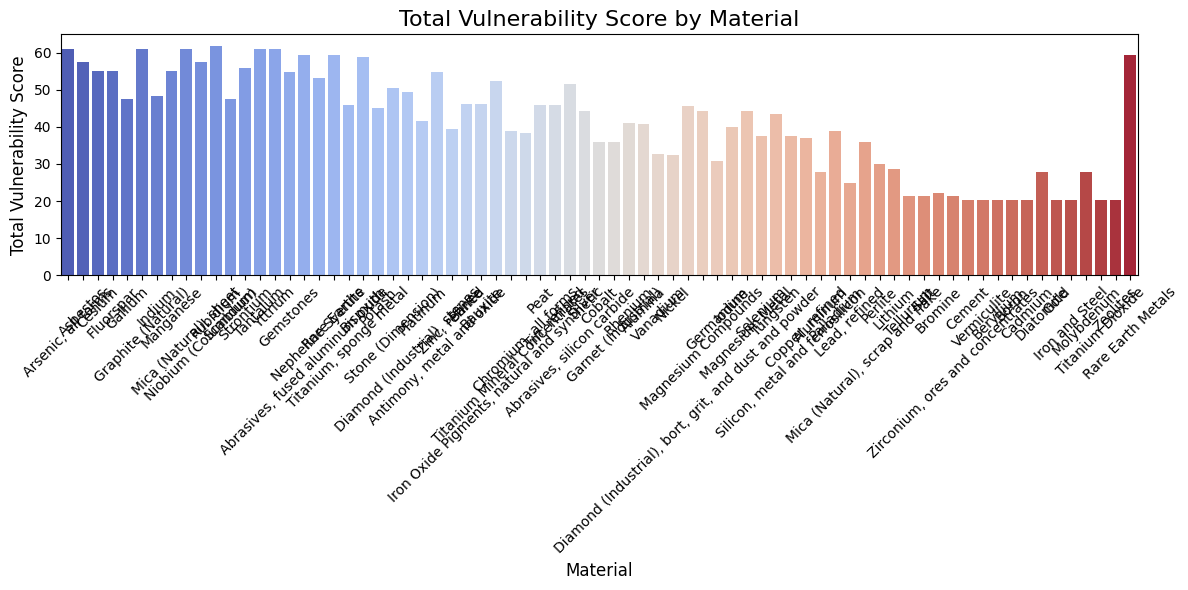

In [7]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Material', y='Total_Vulnerability_Score', palette='coolwarm')
plt.title("Total Vulnerability Score by Material", fontsize=16)
plt.xlabel("Material", fontsize=12)
plt.ylabel("Total Vulnerability Score", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




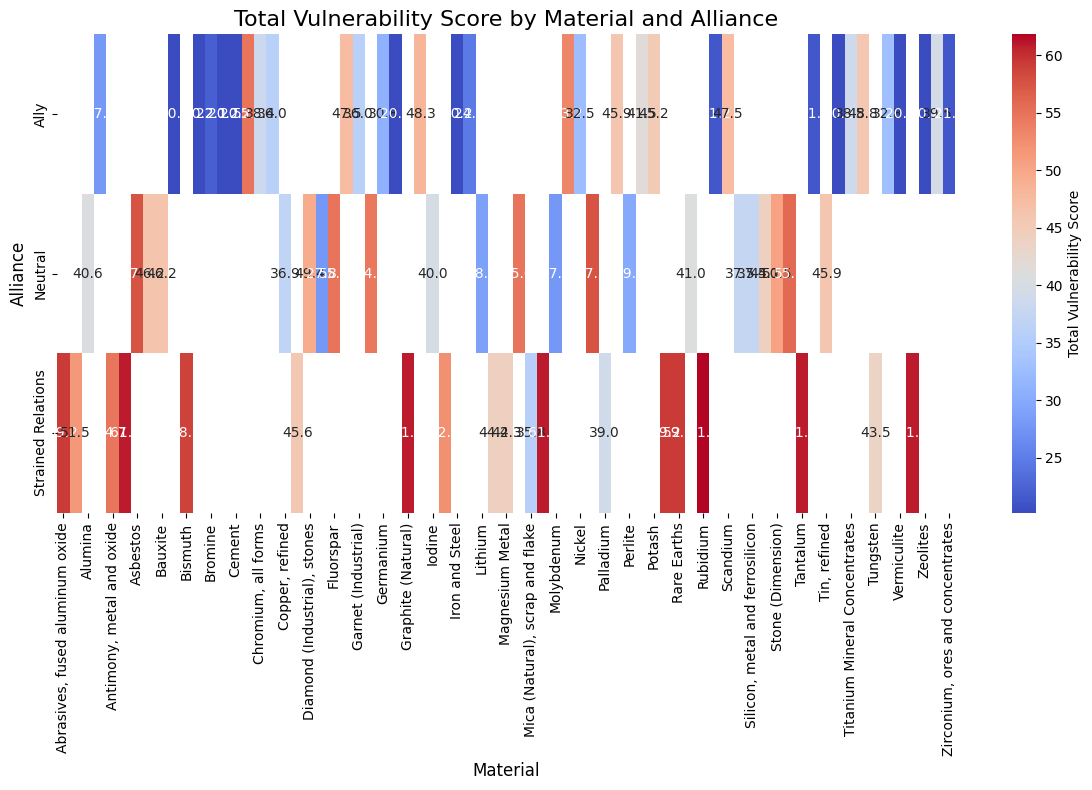

In [8]:
heatmap_data = df.pivot_table(
    index='Alliance',
    columns='Material',
    values='Total_Vulnerability_Score',
    aggfunc='mean'
)

plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".1f",
    cmap='coolwarm',
    cbar_kws={'label': 'Total Vulnerability Score'}
)
plt.title("Total Vulnerability Score by Material and Alliance", fontsize=16)
plt.xlabel("Material", fontsize=12)
plt.ylabel("Alliance", fontsize=12)
plt.tight_layout()
plt.show()



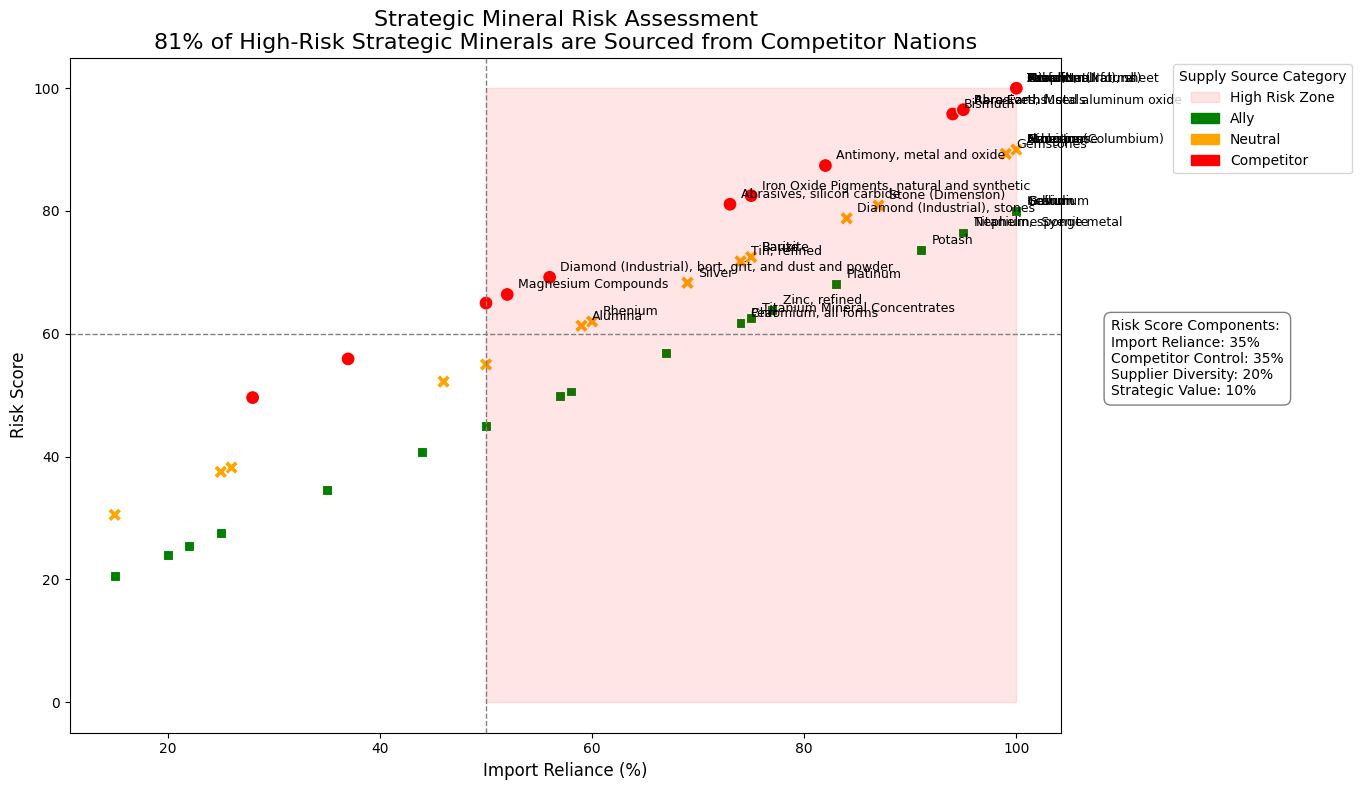

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define high-risk zone thresholds
HIGH_RISK_THRESHOLD_RISK_SCORE = 60
HIGH_RISK_THRESHOLD_IMPORT_RELIANCE = 50

# Create the scatter plot
plt.figure(figsize=(14, 8))

# Scatter plot for Risk Score vs. Import Reliance
sns.scatterplot(
    data=df,
    x='Import_Reliance_Pct',
    y='Risk_Score',
    hue='Alliance',  # Color by alliance
    style='Alliance',  # Different markers for alliance
    s=100,  # Size of the points
    palette={"Ally": "green", "Neutral": "orange", "Strained Relations": "red"}
)

# Highlight the high-risk zone
plt.axhline(y=HIGH_RISK_THRESHOLD_RISK_SCORE, color='gray', linestyle='--', linewidth=1)
plt.axvline(x=HIGH_RISK_THRESHOLD_IMPORT_RELIANCE, color='gray', linestyle='--', linewidth=1)
plt.fill_betweenx(
    y=np.linspace(0, 100, 100),
    x1=HIGH_RISK_THRESHOLD_IMPORT_RELIANCE,
    x2=100,
    color='red',
    alpha=0.1,
    label="High Risk Zone"
)

# Add title and labels
plt.title(
    "Strategic Mineral Risk Assessment\n81% of High-Risk Strategic Minerals are Sourced from Competitor Nations",
    fontsize=16
)
plt.xlabel("Import Reliance (%)", fontsize=12)
plt.ylabel("Risk Score", fontsize=12)

# Add annotations for high-risk materials
for i, row in df.iterrows():
    if row['Risk_Score'] > HIGH_RISK_THRESHOLD_RISK_SCORE and row['Import_Reliance_Pct'] > HIGH_RISK_THRESHOLD_IMPORT_RELIANCE:
        plt.text(
            row['Import_Reliance_Pct'] + 1,  # Slight offset on x-axis
            row['Risk_Score'] + 1,  # Slight offset on y-axis
            row['Material'],  # Material name
            fontsize=9,
            color='black'
        )

# Add a legend for risk score components
import matplotlib.patches as mpatches
legend_elements = [
    mpatches.Patch(color='red', alpha=0.1, label="High Risk Zone"),
    mpatches.Patch(color='green', label='Ally'),
    mpatches.Patch(color='orange', label='Neutral'),
    mpatches.Patch(color='red', label='Competitor')
]
plt.legend(
    title="Supply Source Category",
    loc='upper right',
    bbox_to_anchor=(1.3, 1),
    handles=legend_elements
)

# Add description of risk score components
plt.text(
    1.05, 0.5,
    "Risk Score Components:\n"
    "Import Reliance: 35%\n"
    "Competitor Control: 35%\n"
    "Supplier Diversity: 20%\n"
    "Strategic Value: 10%",
    fontsize=10,
    transform=plt.gca().transAxes,
    bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5')
)

# Show plot
plt.tight_layout()
plt.show()



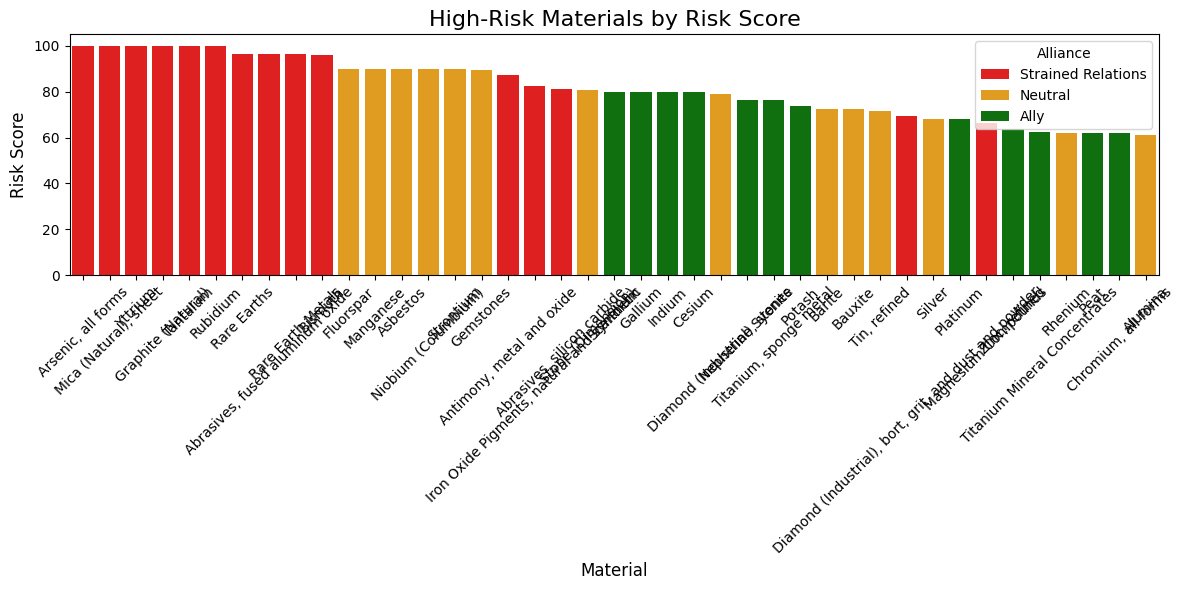

In [10]:
# Filter high-risk materials
high_risk_materials = df[
    (df['Risk_Score'] > HIGH_RISK_THRESHOLD_RISK_SCORE) &
    (df['Import_Reliance_Pct'] > HIGH_RISK_THRESHOLD_IMPORT_RELIANCE)
]

# Sort by Risk Score
high_risk_materials = high_risk_materials.sort_values(by='Risk_Score', ascending=False)

# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=high_risk_materials,
    x='Material',
    y='Risk_Score',
    hue='Alliance',
    dodge=False,  # Avoid splitting bars
    palette={"Ally": "green", "Neutral": "orange", "Strained Relations": "red"}
)
plt.title("High-Risk Materials by Risk Score", fontsize=16)
plt.xlabel("Material", fontsize=12)
plt.ylabel("Risk Score", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


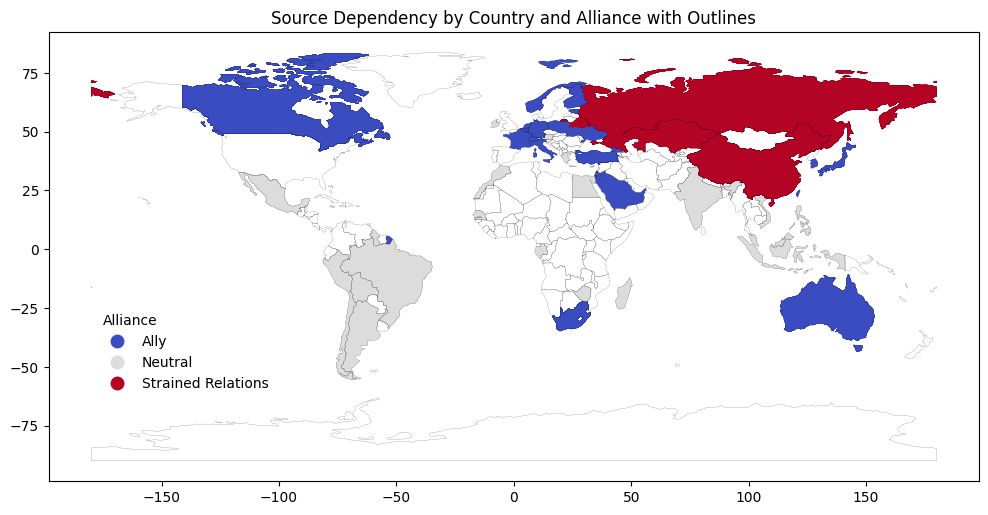

In [11]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load Natural Earth dataset
url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)

# Merge with your data (ensure 'Country' and 'ADMIN' align)
world['ADMIN'] = world['ADMIN'].str.strip().str.lower()  # Normalize country names
df_exploded['Country'] = df_exploded['Country'].str.strip().str.lower()
merged = world.merge(df_exploded, left_on="ADMIN", right_on="Country", how="left")

# Plot the map with outlines for all countries
fig, ax = plt.subplots(figsize=(12, 8))

# Plot countries with data (color by alliance)
merged.plot(column="Alliance", legend=True, cmap="coolwarm", ax=ax)

# Plot outlines for all countries (those without data will appear with no fill)
world.boundary.plot(ax=ax, color="black", linewidth=0.1)
# Customize legend and move it to the bottom-left within the plot
legend = ax.get_legend()
legend.set_bbox_to_anchor((0.25, 0.4))  # Adjust position within the plot (x, y relative to axes)
legend.set_title("Alliance")  # Add a title for clarity
legend._legend_box.align = "left"  # Align legend items to the left
legend.get_frame().set_linewidth(0)
# Add title and display
plt.title("Source Dependency by Country and Alliance with Outlines")
plt.show()


In [12]:
# Fill missing values in the Alliance column
merged['Alliance'] = merged['Alliance'].fillna("Unknown")

# Apply color mapping with a fallback for unmapped categories
merged['Color'] = merged['Alliance'].apply(lambda x: color_mapping.get(x, "grey"))

# Verify that the Color column has no NaN values
print(merged['Color'].isna().sum())  # Should print 0


0


Total number of unique minerals from countries with strained relations: 47
Top countries with strained relations contributing minerals:
      Country  MineralCount
1       china            30
3      russia            13
2  kazakhstan             3
0     belarus             1


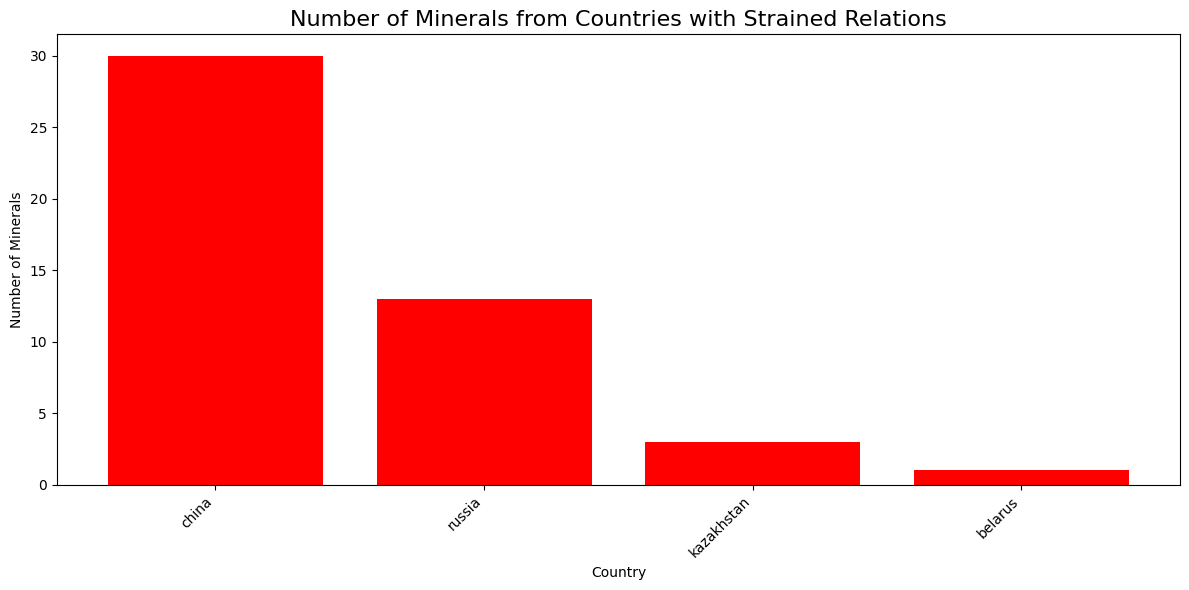

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Filter for countries with strained relations
strained_data = df_exploded[df_exploded['Alliance'] == "Strained Relations"]

# Step 2: Count the number of minerals per country
mineral_counts = strained_data.groupby('Country')['Material'].nunique().reset_index(name='MineralCount')

# Step 3: Summarize the data
total_minerals = mineral_counts['MineralCount'].sum()
print(f"Total number of unique minerals from countries with strained relations: {total_minerals}")

# Display countries contributing the most minerals
top_countries = mineral_counts.sort_values(by='MineralCount', ascending=False)
print("Top countries with strained relations contributing minerals:")
print(top_countries)

# Step 4: Visualize the results
plt.figure(figsize=(12, 6))
plt.bar(top_countries['Country'], top_countries['MineralCount'], color='red')
plt.title("Number of Minerals from Countries with Strained Relations", fontsize=16)
plt.xlabel("Country")
plt.ylabel("Number of Minerals")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


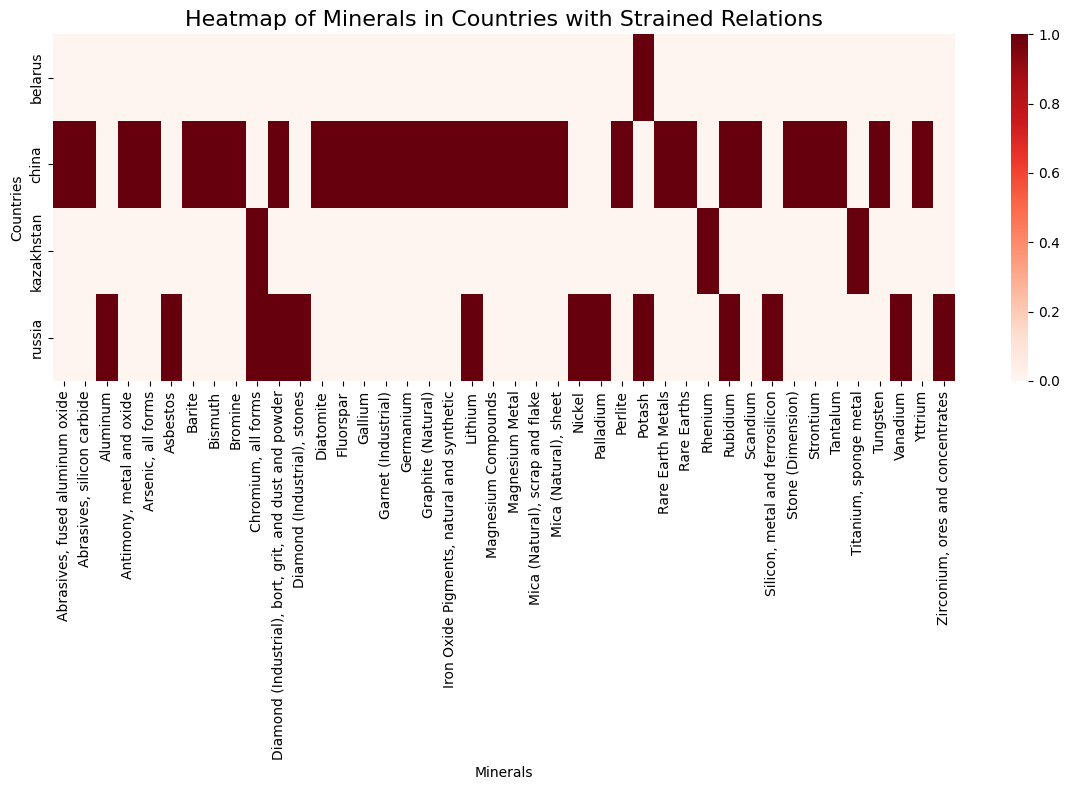

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter for strained relations
strained_countries = df_exploded[df_exploded['Alliance'] == 'Strained Relations']

# Check if filtered data is empty
if strained_countries.empty:
    print("No data available for countries with strained relations.")
else:
    # Create a pivot table (countries as rows, minerals as columns)
    heatmap_data = strained_countries.pivot_table(
        index='Country',
        columns='Material',
        aggfunc='size',  # Count occurrences of each mineral per country
        fill_value=0     # Fill missing values with 0
    )

    # Check if pivot table is empty
    if heatmap_data.empty:
        print("No data available for heatmap.")
    else:
        # Plot the heatmap
        plt.figure(figsize=(12, 8))
        sns.heatmap(heatmap_data, cmap="Reds", annot=False, cbar=True)

        # Customize plot
        plt.title("Heatmap of Minerals in Countries with Strained Relations", fontsize=16)
        plt.xlabel("Minerals")
        plt.ylabel("Countries")
        plt.xticks(rotation=90)
        plt.tight_layout()

        # Show plot
        plt.show()




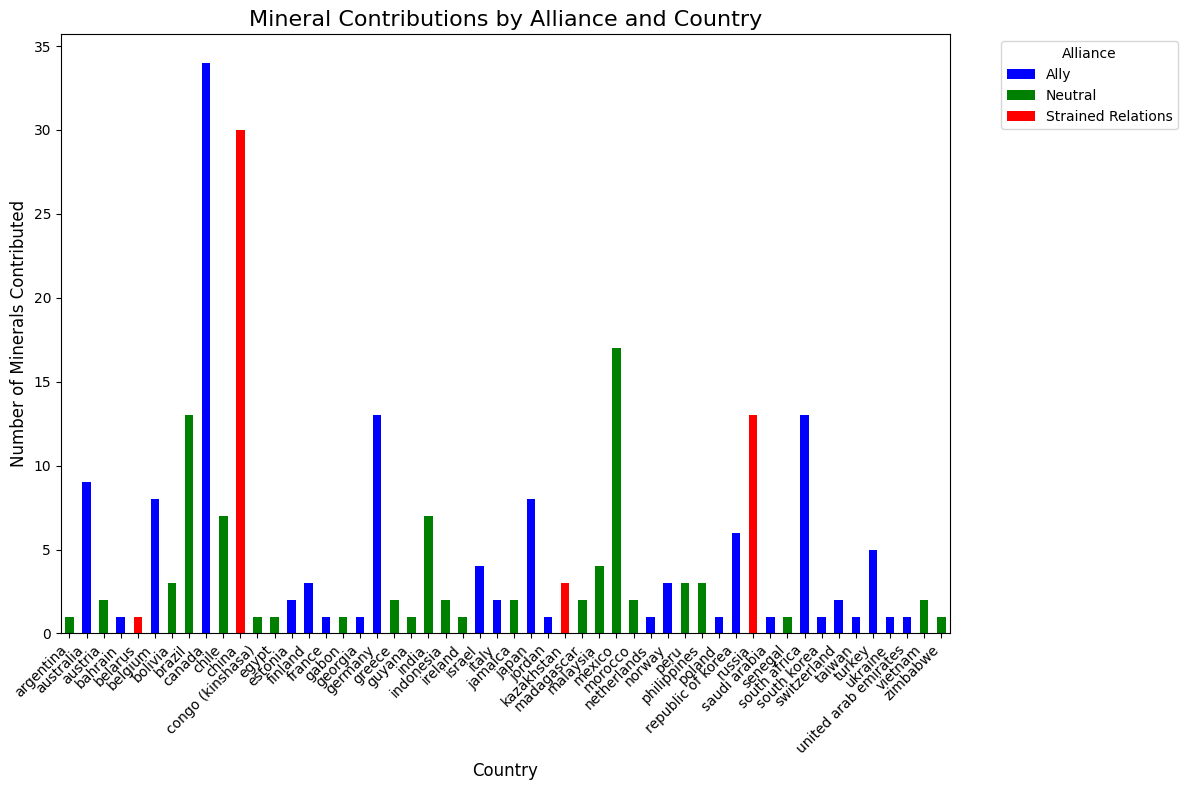

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Aggregate data for stacked bar chart
stacked_data = df_exploded.groupby(['Alliance', 'Country'])['Material'].count().unstack(fill_value=0)

# Plot the stacked bar chart
stacked_data.T.plot(kind='bar', stacked=True, figsize=(12, 8), color={
    "Ally": "blue",
    "Neutral": "green",
    "Strained Relations": "red",
    "Unknown": "orange"
})

# Customize the plot
plt.title("Mineral Contributions by Alliance and Country", fontsize=16)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Number of Minerals Contributed", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title="Alliance", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

# Show the plot
plt.show()



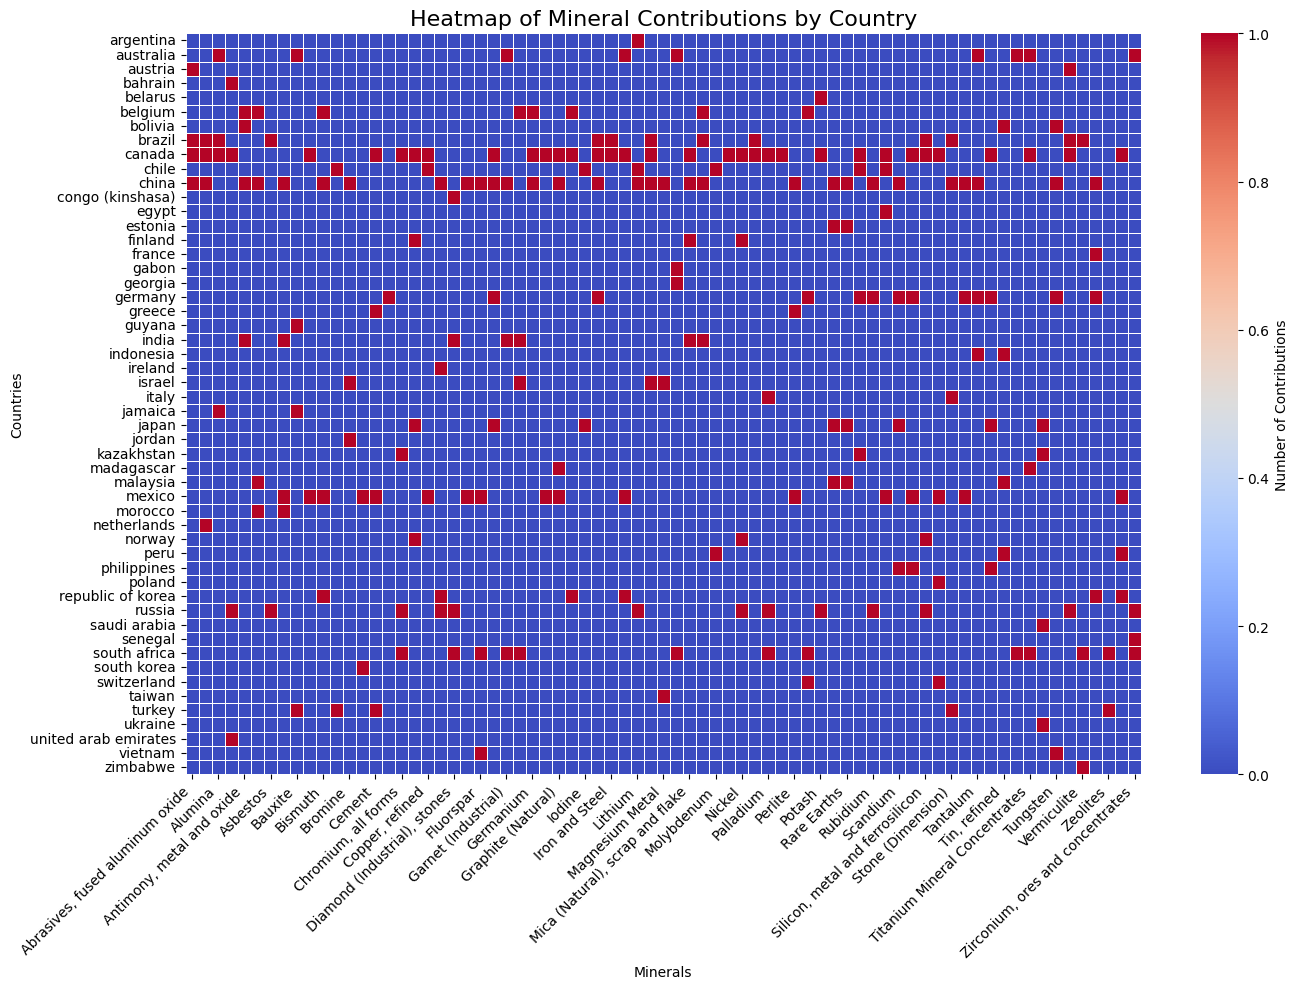

In [16]:
import seaborn as sns

# Create heatmap data (countries as rows, minerals as columns)
heatmap_data = df_exploded.pivot_table(
    index='Country',
    columns='Material',
    aggfunc='size',
    fill_value=0
)

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    heatmap_data,
    cmap="coolwarm",
    linewidths=0.5,
    cbar_kws={'label': 'Number of Contributions'}
)

# Customize the heatmap
plt.title("Heatmap of Mineral Contributions by Country", fontsize=16)
plt.xlabel("Minerals")
plt.ylabel("Countries")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


In [17]:
print(violin_data.head())
print(violin_data.describe())
print(violin_data[violin_data['TotalMinerals'] < 0])
violin_data = df_exploded.groupby(['Country', 'Alliance'])['Material'].count().reset_index()
violin_data.columns = ['Country', 'Alliance', 'TotalMinerals']
print(df_exploded[df_exploded['Material'] < 0])


NameError: name 'violin_data' is not defined

In [ ]:
sns.boxplot(data=violin_data, x='Alliance', y='TotalMinerals', palette='coolwarm')


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(
    data=violin_data,            # Dataframe with aggregated data
    x='Alliance',                # Alliances as categories on the x-axis
    y='TotalMinerals',           # Total minerals contributed on the y-axis
    palette={                    # Custom color palette for alliances
        "Ally": "blue",
        "Neutral": "green",
        "Strained Relations": "red",
        "Unknown": "orange"
    },
    showmeans=True,              # Add mean values to the plot
    meanline=True,               # Show mean as a line
    whis=1.5                     # Define whiskers (1.5x IQR by default)
)

# Add titles and labels
plt.title("Boxplot of Mineral Contributions by Alliance", fontsize=16)
plt.xlabel("Alliance", fontsize=12)
plt.ylabel("Total Mineral Contributions", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
#how to measure shortfall impact
    "Alliance": ["Ally", "Neutral", "Strained Relations", "Neutral", "Strained Relations"],

# Normalize Import_Reliance_Pct to a 0–1 scale
df['Import_Reliance_Normalized'] = df['Import_Reliance_Pct'] / 100

# Assign alliance scores for geopolitical stability
alliance_scores = {
    "Ally": 0.1,               # Low risk
    "Neutral": 0.5,            # Medium risk
    "Strained Relations": 1.0, # High risk
    "Unknown": 0.7             # Default for missing or unknown alliances
}
df['Alliance_Score'] = df['Alliance'].map(alliance_scores)

# Calculate Supply Risk
# Weight Import Reliance more heavily (70%) compared to Alliance Risk (30%)
df['Supply_Risk'] = 0.7 * df['Import_Reliance_Normalized'] + 0.3 * df['Alliance_Score']

# Calculate the Criticality Score
# Weighting Supply Risk, Economic Importance, and Substitutability
df['Criticality_Score'] = (
    0.5 * df['Supply_Risk'] +                          # 50% weight to Supply Risk
    0.3 * df['Economic_Importance'] +                 # 30% weight to Economic Importance
    0.2 * (1 - df['Substitutability'])                # 20% weight to Substitutability (lower substitutability = higher risk)
)

# Display the results
print(df)

# Optional: Sort by Criticality Score
df = df.sort_values(by="Criticality_Score", ascending=False)

# Visualization (Bar Chart)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(
    x="Criticality_Score",
    y="Mineral",
    data=df,
    palette="coolwarm"
)
plt.title("Criticality Scores by Mineral", fontsize=16)
plt.xlabel("Criticality Score", fontsize=12)
plt.ylabel("Mineral", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()